<a href="https://colab.research.google.com/github/ezecon/House-Price-Predict/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
import xgboost as xgb

from scipy import stats

In [3]:
missing_value = ["N/a","na","NaN",np.nan]

In [4]:

drive.mount('/content/drive')
path_to_csv = '/content/drive/MyDrive/Kaggle Data Set/housing.csv'
df1 = pd.read_csv(path_to_csv, na_values=missing_value)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
df1.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
#-----------optional------------
#remove rows which have atleast onee null value
df = df1.dropna()

In [8]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

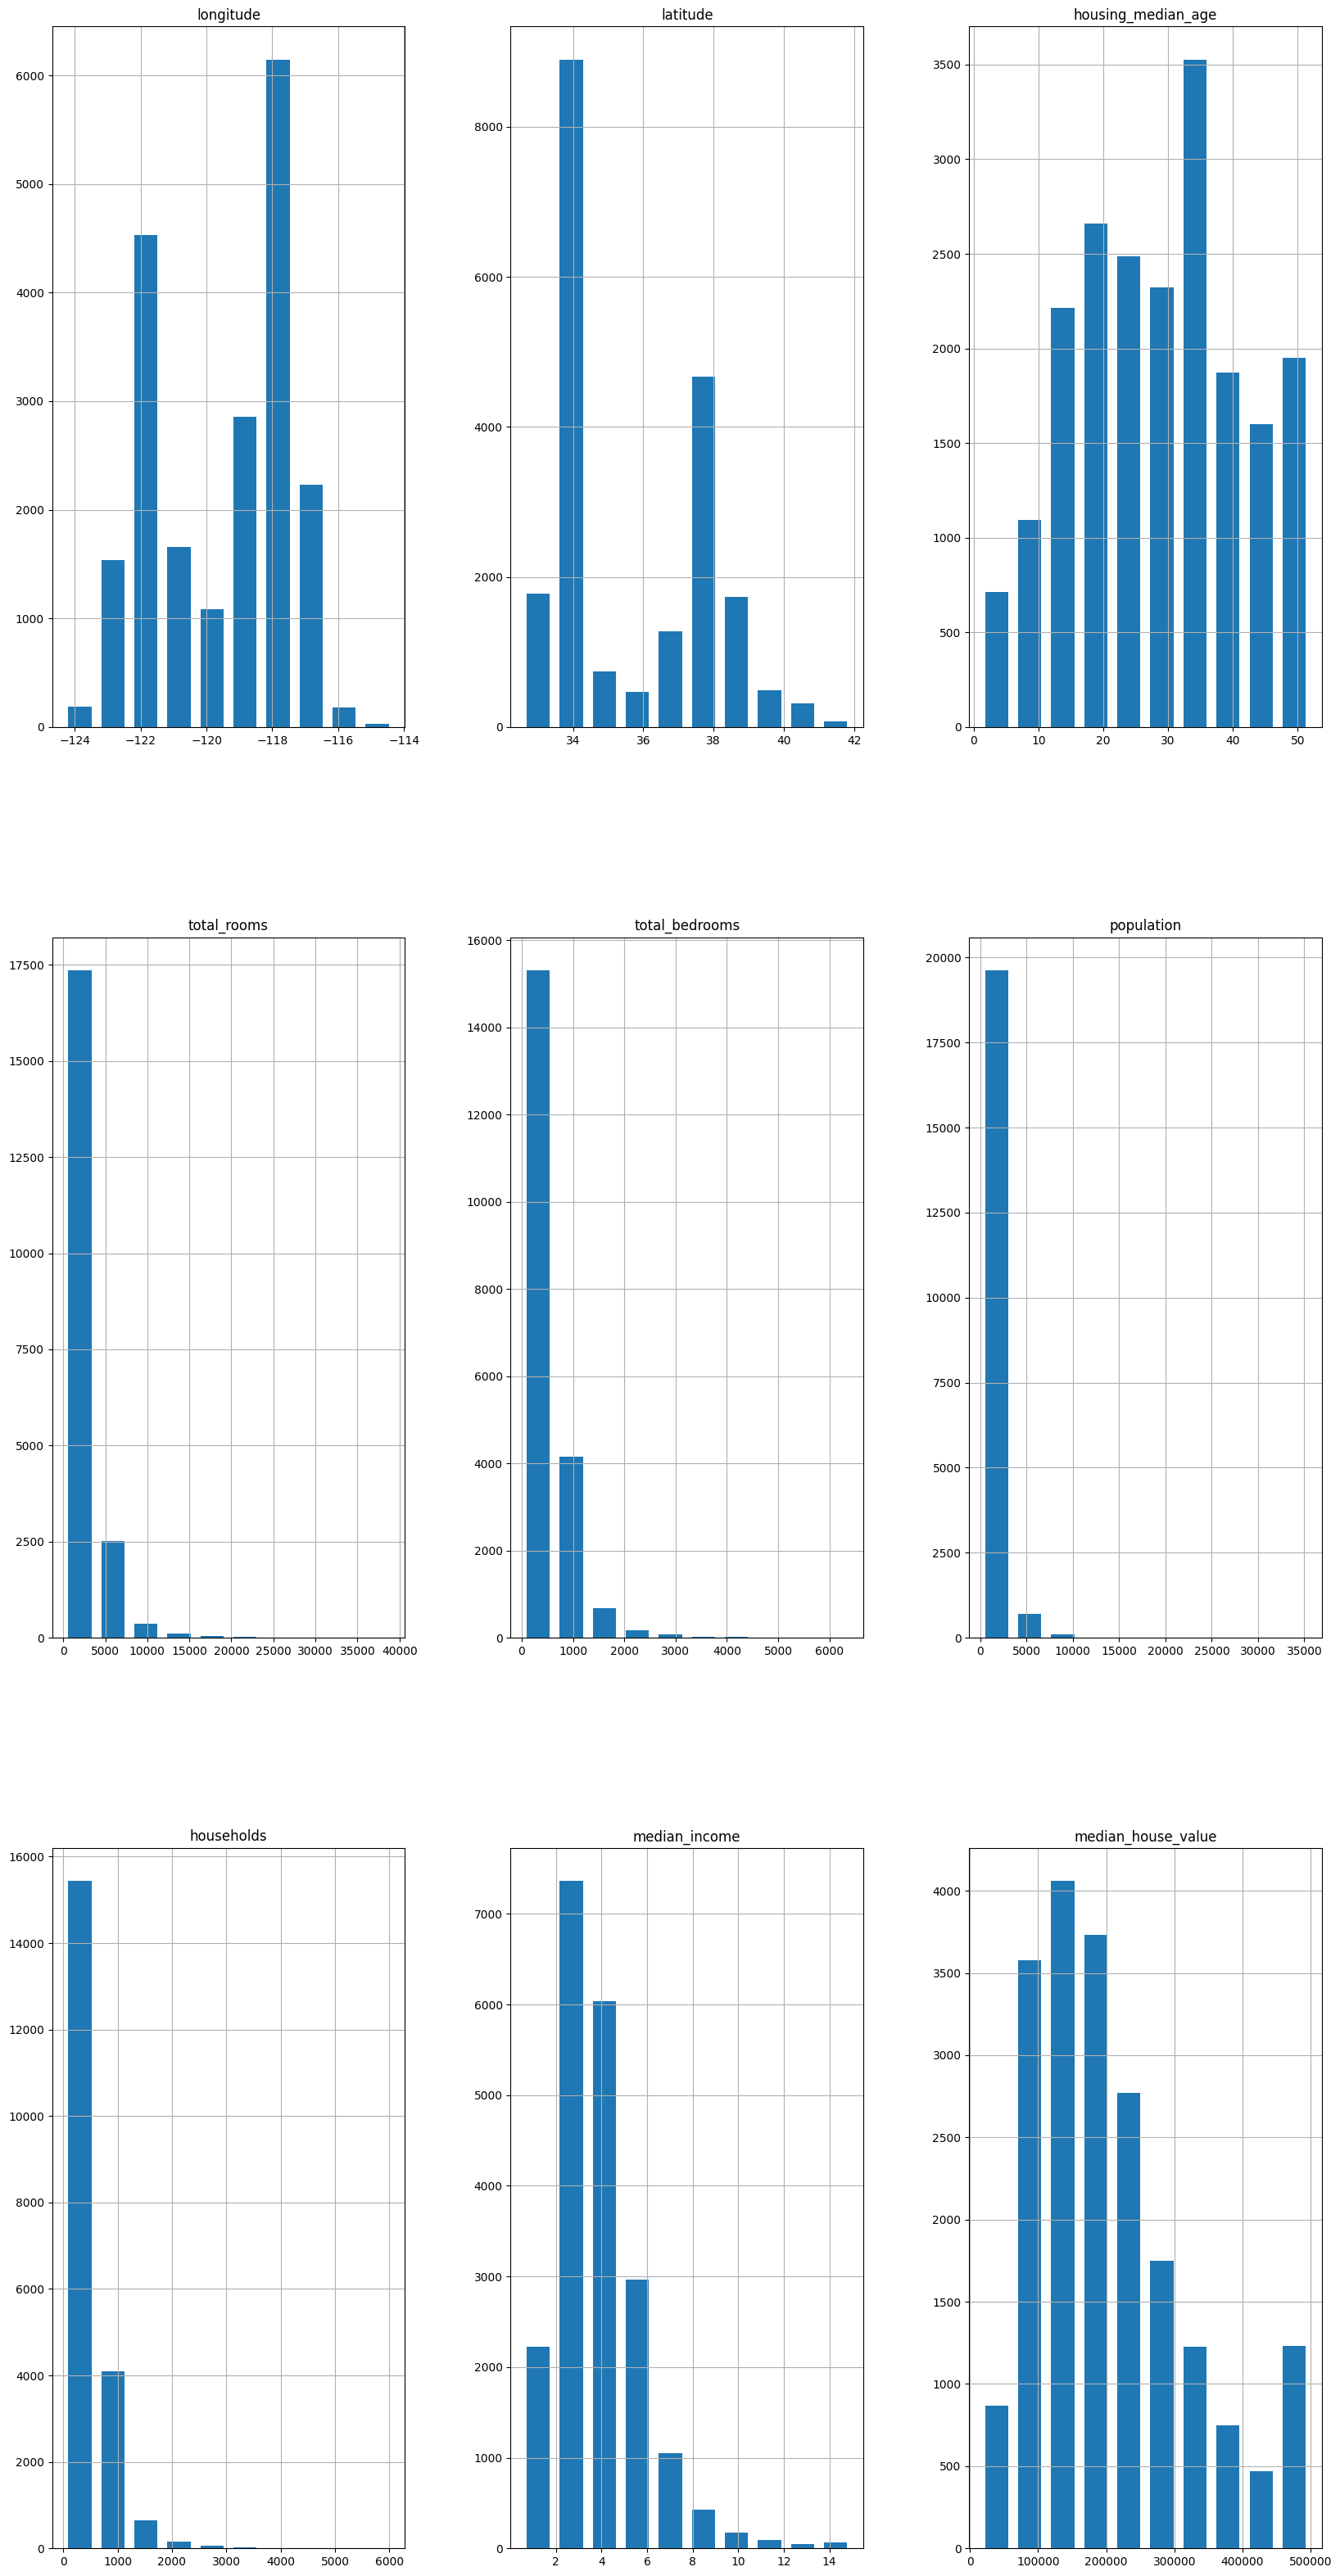

In [9]:
df.hist(figsize=(20,40),histtype="bar",rwidth=0.7)


In [10]:

int_columns = df.select_dtypes(include=['int64', 'float64']).columns
object_columns= df.select_dtypes(include=['object']).columns
# Display the lists of object and int columns
print("Object Columns:", object_columns)
print("\nInt Columns:", int_columns)


Object Columns: Index(['ocean_proximity'], dtype='object')

Int Columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


In [11]:
import numpy as np
from scipy import stats

int_array = df[int_columns].values
print(int_array)

[[-1.2223e+02  3.7880e+01  4.1000e+01 ...  1.2600e+02  8.3252e+00
   4.5260e+05]
 [-1.2222e+02  3.7860e+01  2.1000e+01 ...  1.1380e+03  8.3014e+00
   3.5850e+05]
 [-1.2224e+02  3.7850e+01  5.2000e+01 ...  1.7700e+02  7.2574e+00
   3.5210e+05]
 ...
 [-1.2122e+02  3.9430e+01  1.7000e+01 ...  4.3300e+02  1.7000e+00
   9.2300e+04]
 [-1.2132e+02  3.9430e+01  1.8000e+01 ...  3.4900e+02  1.8672e+00
   8.4700e+04]
 [-1.2124e+02  3.9370e+01  1.6000e+01 ...  5.3000e+02  2.3886e+00
   8.9400e+04]]


[[1.32731375 1.05171726 0.98216331 ... 0.97683327 2.34516291 2.12881864]
 [1.32232256 1.04235526 0.60621017 ... 1.67037262 2.33263161 1.31362603]
 [1.33230494 1.03767426 1.85576873 ... 0.84342665 1.78293943 1.25818254]
 ...
 [0.82320322 1.77727236 0.92388486 ... 0.17377773 1.14317103 0.99247676]
 [0.87311515 1.77727236 0.84446619 ... 0.39350628 1.05513604 1.05831591]
 [0.83318561 1.74918635 1.00330353 ... 0.07995643 0.78060586 1.01759959]]


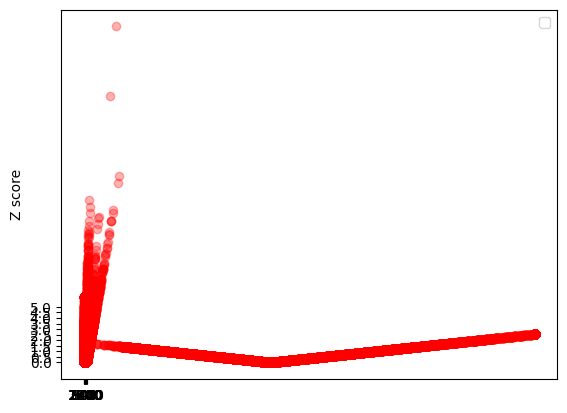

In [12]:
# calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(int_array))
print(z)


plt.scatter(int_array,z,color='red',alpha=0.3)
plt.ylabel('Z score')

plt.xticks(np.arange(0, 3500, 300))
plt.yticks(np.arange(0, 5.5 , 0.5))

plt.legend()
plt.show()

(array([   95,    95,   104, ..., 20422, 20422, 20422]), array([4, 6, 4, ..., 4, 5, 6]))


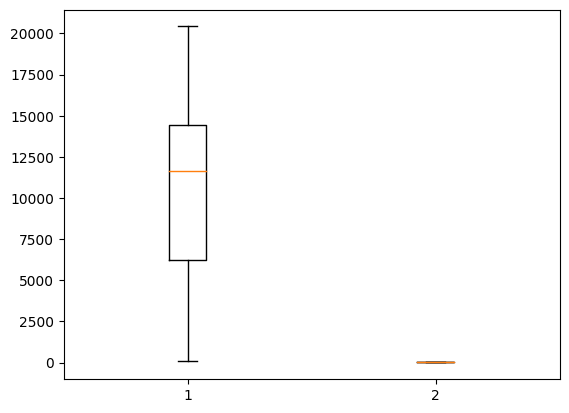

In [13]:
# Defining threshold for filtering outliers
threshold = 3
print(np.where(z >= 3))

z_box=np.where(z >= 3)

plt.boxplot(z_box)
plt.show()

In [14]:
#filtering outliers retaining only those data points which are below threshhold
df = df[(z <= 3).all(axis=1)]

In [15]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in object_columns:
    df[col] = le.fit_transform(df[col])

In [20]:
# segregating dataset into features i.e., X and target variables i.e., y
X = df.drop(['median_house_value'],axis=1)
y = df['median_house_value']

In [21]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [23]:
target_column = 'median_house_value'
y_train = df_train[target_column]
y_test = df_test[target_column]
X_train = df_train.drop(columns=[target_column])
X_test = df_test.drop(columns=[target_column])

In [24]:
x_test=X_train
x_train=X_train
Y_train=y_train
Y_test=y_test

In [26]:

import numpy as np
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
%matplotlib inline
!pip install --upgrade pip
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
! pip install -q scikit-plot
import scikitplot as skplt
import pickle

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [27]:
import warnings
warnings.filterwarnings('ignore')

# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
import xgboost as xgb

from scipy import stats

In [28]:
comp_ev = pd.DataFrame({'Model': [],
                           'Accuracy(train)':[],
                           'Precision(train)':[],
                           'Recall(train)':[],

                           'F1_score(train)':[],
                          'ROC(train)':[],
                        'Log_Loss(train)':[],
                        'mathew_corrcoef(train)':[],
                         'Accuracy(test)':[],
                           'Precision(test)':[],
                           'Recall(test)':[],

                           'F1_score(test)':[],
                          'ROC(test)':[],
                        'Log_Loss(test)':[],
                        'mathew_corrcoef(test)':[],})


In [29]:
test_accuracy=[]
train_accuracy=[]

test_accuracy_dict={}
train_accuracy_dict={}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, log_loss, matthews_corrcoef
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Assuming you have already loaded and preprocessed your data and split it into X_train, y_train, X_test, and y_test

# Logistic Regression Model Training:
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)

# Accuracy Calculation:
acc_train1 = format(accuracy_score(log_model.predict(X_train), y_train), '.3f')
acc_test1 = format(accuracy_score(log_model.predict(X_test), y_test), '.3f')

train_accuracy.append(acc_train1)
test_accuracy.append(acc_test1)

train_accuracy_dict['LR']=acc_train1
test_accuracy_dict['LR']=acc_test1

print('The accuracy of the Logistic Regression is (For training data):', acc_train1)
print('The accuracy of the Logistic Regression is (For test data):', acc_test1)

# Prediction and Evaluation Metrics:
y_pred_train = log_model.predict(X_train)
y_pred_test = log_model.predict(X_test)

precision_train1 = format(precision_score(y_train, y_pred_train, average='macro'), '.3f')
precision_test1 = format(precision_score(y_test, y_pred_test, average='macro'), '.3f')

recall_train1 = format(recall_score(y_train, y_pred_train, average='macro'), '.3f')
recall_test1 = format(recall_score(y_test, y_pred_test, average='macro'), '.3f')

f1_train1 = format(f1_score(y_train, y_pred_train, average='macro'), '.3f')
f1_test1 = format(f1_score(y_test, y_pred_test, average='macro'), '.3f')

roc_train1 = roc_auc_score(y_train, log_model.predict_proba(X_train), multi_class='ovr')
roc_test1 = roc_auc_score(y_test, log_model.predict_proba(X_test), multi_class='ovr')

CM = confusion_matrix(y_test, y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1 = log_loss(y_train, log_model.predict_proba(X_train))
log_loss_test1 = log_loss(y_test, log_model.predict_proba(X_test))

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

# Assuming comp_ev is a DataFrame where you store your metrics
r = comp_ev.shape[0]
comp_ev.loc[r] = ['Logistic Regression', acc_train1, precision_train1, recall_train1, f1_train1, log_loss_train1, mathew_train1, roc_train1, acc_test1, precision_test1, recall_test1, f1_test1, roc_test1, log_loss_test1, mathew_test1]

# Apply SMOTE to the training data:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Logistic Regression Model Training on SMOTE data:
log_model_smote = LogisticRegression(max_iter=500)
log_model_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions and calculate metrics on the resampled data:
y_pred_train_smote = log_model_smote.predict(X_train_resampled)
y_pred_test_smote = log_model_smote.predict(X_test)

# Calculate evaluation metrics for SMOTE data:
acc_train_smote = format(accuracy_score(y_train_resampled, y_pred_train_smote), '.3f')
acc_test_smote = format(accuracy_score(y_test, y_pred_test_smote), '.3f')

precision_train_smote = format(precision_score(y_train_resampled, y_pred_train_smote, average='macro'), '.3f')
precision_test_smote = format(precision_score(y_test, y_pred_test_smote, average='macro'), '.3f')

recall_train_smote = format(recall_score(y_train_resampled, y_pred_train_smote, average='macro'), '.3f')
recall_test_smote = format(recall_score(y_test, y_pred_test_smote, average='macro'), '.3f')

f1_train_smote = format(f1_score(y_train_resampled, y_pred_train_smote, average='macro'), '.3f')
f1_test_smote = format(f1_score(y_test, y_pred_test_smote, average='macro'), '.3f')

roc_train_smote = roc_auc_score(y_train_resampled, log_model_smote.predict_proba(X_train_resampled), multi_class='ovr')
roc_test_smote = roc_auc_score(y_test, log_model_smote.predict_proba(X_test), multi_class='ovr')

CM_smote = confusion_matrix(y_test, y_pred_test_smote)
sns.heatmap(CM_smote, annot=True)

log_loss_train_smote = log_loss(y_train_resampled, log_model_smote.predict_proba(X_train_resampled))
log_loss_test_smote = log_loss(y_test, log_model_smote.predict_proba(X_test))

mathew_train_smote = matthews_corrcoef(y_train_resampled, y_pred_train_smote)
mathew_test_smote = matthews_corrcoef(y_test, y_pred_test_smote)

# Assuming comp_ev is a DataFrame where you store your metrics
r = comp_ev.shape[0]
comp_ev.loc[r] = ['Logistic Regression with SMOTE', acc_train_smote, precision_train_smote, recall_train_smote, f1_train_smote, log_loss_train_smote, mathew_train_smote, roc_train_smote, acc_test_smote, precision_test_smote, recall_test_smote, f1_test_smote, roc_test_smote, log_loss_test_smote, mathew_test_smote]

comp_ev.sort_values(by='Accuracy(test)', ascending=False)
